In [5]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [6]:
(X_train, y_ttain),(X_test,y_test) = mnist.load_data()

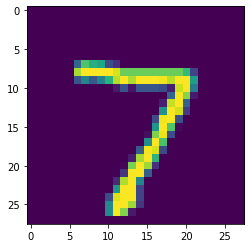

In [10]:
plt.imshow(X_test[0])

In [9]:
y_test[0]

7

In [14]:
# flat32타입 변환

X_train.astype("float32")/255
X_test.astype("float32")/255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
# shape 조회
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


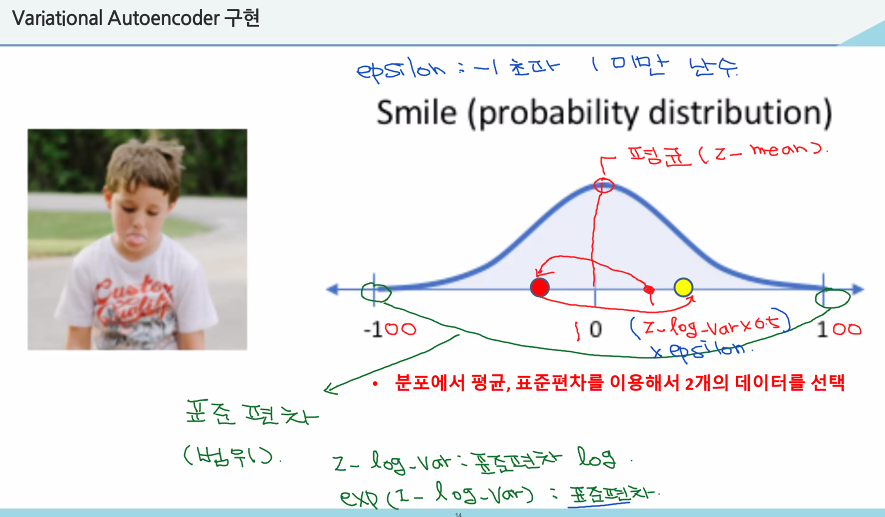

epsilon :-1 초과 1 미만 난수

z_log_var : 표준편차 log

exp(z_log_var):표준편차


In [21]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

In [30]:
# 분포에서 2개의 데이터를 선택
class Sampling(layers.Layer):
      # input : 학습할 분포의 평균, 표준편차의 로그 값이 각각 두개 저장된 리스트
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilong = tf.keras.backend.random_normal(shape=(batch,dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilong

In [31]:
encoder_inputs = keras.Input(shape=(28*28))
x = layers.Dense(256, activation="relu")(encoder_inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)

z_mean = layers.Dense(2, name="z_mean")(x) # 활성화함수 x 평균이 음수일수있고 양수일수 있음
z_log_var = layers.Dense(2, name="z_log_var")(x)
z = Sampling()([z_mean,z_log_var])

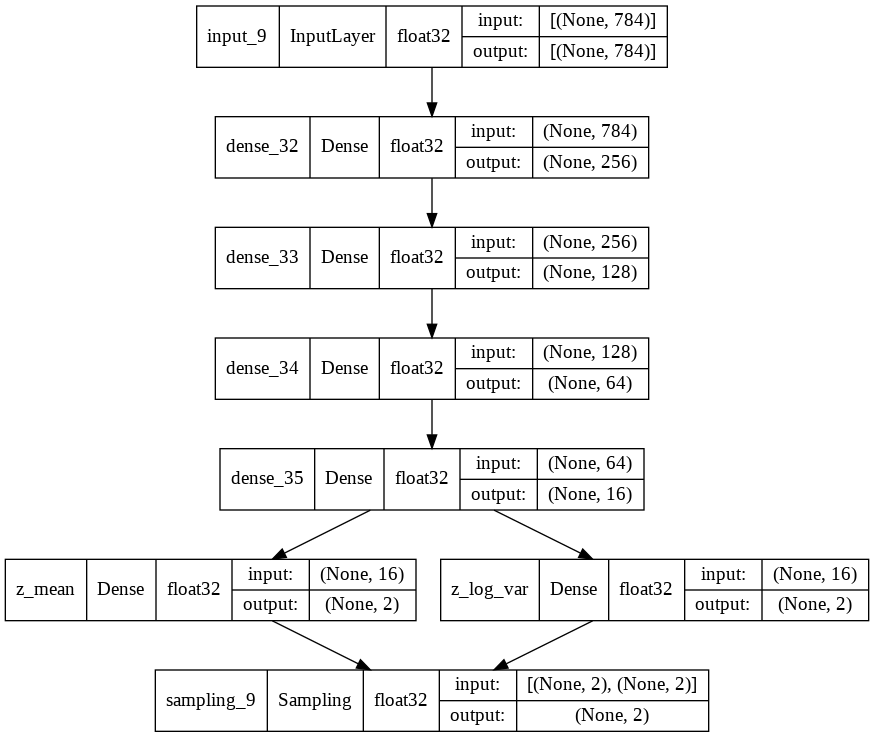

In [32]:
z = Sampling()([z_mean,z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var,z], name="encoder")

from tensorflow.keras.utils import plot_model
plot_model(encoder, show_shapes = True, show_dtype=True)

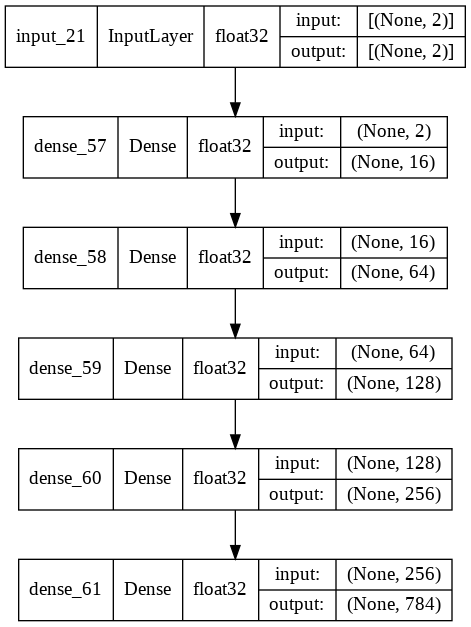

In [40]:
# 2개의 샘플데이터를 입력으로 원래 이미지를 복원
# 2칸 입력 받은(sample2개)
encoder_inputs = keras.Input(shape=(28*28))
#16번 선형회귀
latent_inputs = keras.Input(shape=(2,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
decoder_outputs = layers.Dense(28*28, activation="sigmoid")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
plot_model(decoder, show_shapes=True, show_dtype=True)

In [41]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_57 (Dense)            (None, 16)                48        
                                                                 
 dense_58 (Dense)            (None, 64)                1088      
                                                                 
 dense_59 (Dense)            (None, 128)               8320      
                                                                 
 dense_60 (Dense)            (None, 256)               33024     
                                                                 
 dense_61 (Dense)            (None, 784)               201488    
                                                                 
Total params: 243,968
Trainable params: 243,968
Non-trainab

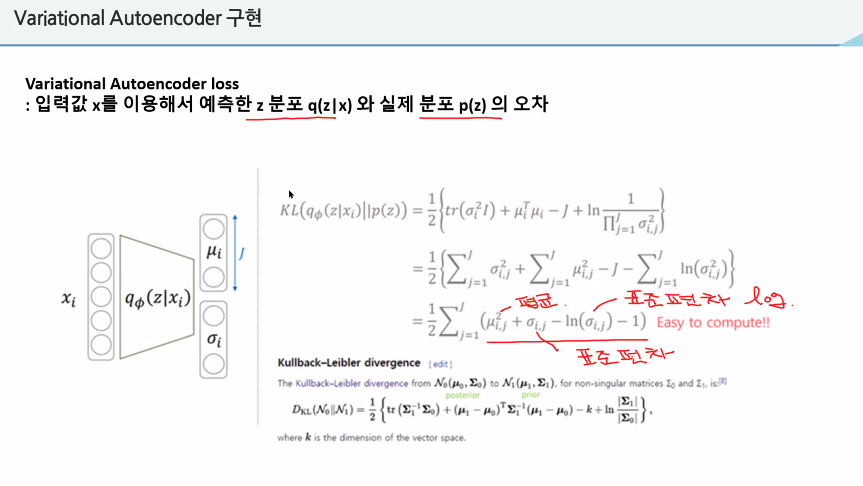

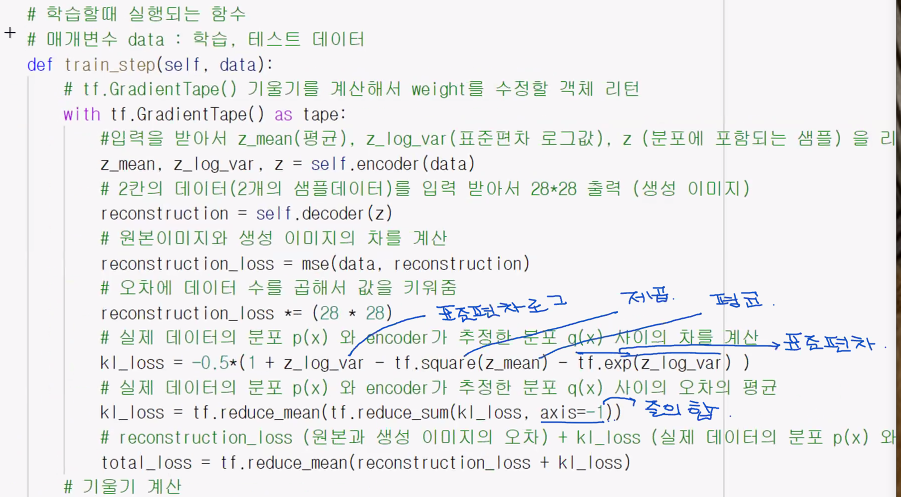

In [43]:
# variational autoencoder 객체 선언
class VAE(keras.Model):
  def __int__(self, encoder, decoder, **kwargs):
    # 객체 생성시 실행되는 함수

    super(VAE, self).__int__(**kwargs)
    # 인코더와 디코더를 입력 받아서 속성에 저장
    self.encoder = encoder
    self.decoder = decoder

    # 학습할 대 실행되는 함수 
    # 매개변수 data: 학습, 테스트데이터
    def train_Step(self, data):
      with tf.GradientTape() as tape:
        z_mean, z_log_var ,z = self.encoder(data)
        reconstruction = self.decoder(z)
        reconstruction_loss = mse(dta,reconstruction)
        reconstruction_loss *= (28*28)
        kl_loss = -0.5*(1+z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=-1))
        total_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
      # 기울기
      grads = tape.gradient(total_loss, self.trainable_weighs)
      self.optimizer.apply_gradients(zip(grads, self.trainaable_weights))

      return{
          "total_loss":total_loss,
          "reconstruction_loss": reconstruction_loss,
          "kl_loss":kl_loss
      }